In [1]:
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
logits = [[100, 0, 100], [1, -0.919, -0.919], [1, -0.385, -0.385], [1, 1, 1]]

# logits = [[100, 0, 100], [1, 0, 0.8], [1, 0, 0.1], [1, 1, 1]]

logits = torch.Tensor(logits)

In [3]:
logits

tensor([[100.0000,   0.0000, 100.0000],
        [  1.0000,  -0.9190,  -0.9190],
        [  1.0000,  -0.3850,  -0.3850],
        [  1.0000,   1.0000,   1.0000]])

In [4]:
probs = torch.softmax(logits, dim=1)

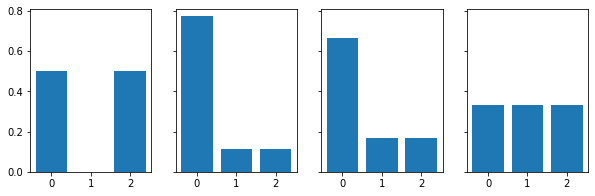

In [5]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(10,3))
for i, p in enumerate(probs):
    axs[i].bar([0, 1, 2], p)

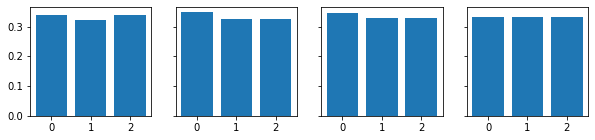

^^ For inverse temperature: 0.1 | Metric0:[0.33884182572364807, 0.34814947843551636, 0.3445257246494293, 0.3333333432674408]


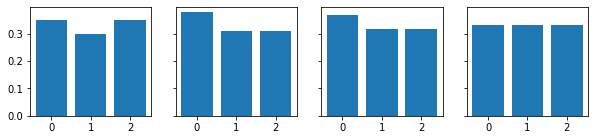

^^ For inverse temperature: 0.3 | Metric0:[0.3495638072490692, 0.37865620851516724, 0.36742570996284485, 0.3333333432674408]


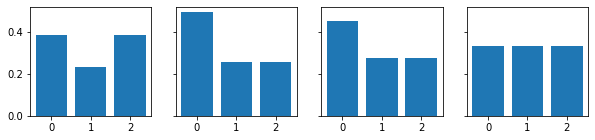

^^ For inverse temperature: 1 | Metric0:[0.3836517333984375, 0.4916234314441681, 0.4517558813095093, 0.3333333432674408]


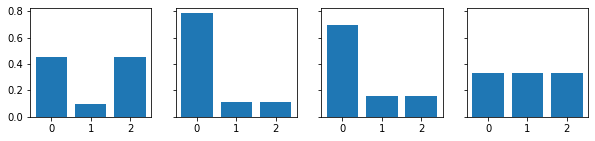

^^ For inverse temperature: 3 | Metric0:[0.44981619715690613, 0.7834296822547913, 0.6911622285842896, 0.3333333432674408]


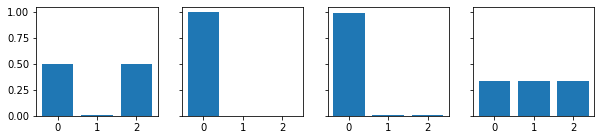

^^ For inverse temperature: 10 | Metric0:[0.49832117557525635, 0.9972768425941467, 0.9866466522216797, 0.3333333432674408]


In [6]:
metric_dict = {i:[] for i in range(len(probs))}
inv_temps = [0.1, 0.3, 1, 3, 10]

for k, inv_temp in enumerate(inv_temps):
    fig, axs = plt.subplots(1, 4, sharey=True, figsize=(10,2))
    vals = []
    for i, p in enumerate(probs):
        out = torch.softmax(p*inv_temp, dim=0)
        axs[i].bar([0, 1, 2], out)
        vals.append(float(out.max()))
        metric_dict[i].append(vals[-1])
        
    plt.show()
    print(f"^^ For inverse temperature: {inv_temp} | Metric0:{vals}")

In [7]:
## Visualize the plot for changing the inv_temp
metric_dict

{0: [0.33884182572364807,
  0.3495638072490692,
  0.3836517333984375,
  0.44981619715690613,
  0.49832117557525635],
 1: [0.34814947843551636,
  0.37865620851516724,
  0.4916234314441681,
  0.7834296822547913,
  0.9972768425941467],
 2: [0.3445257246494293,
  0.36742570996284485,
  0.4517558813095093,
  0.6911622285842896,
  0.9866466522216797],
 3: [0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408,
  0.3333333432674408]}

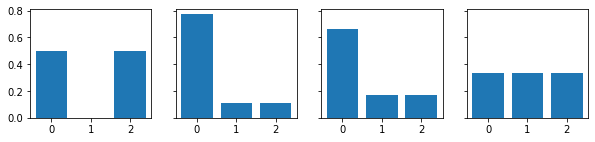

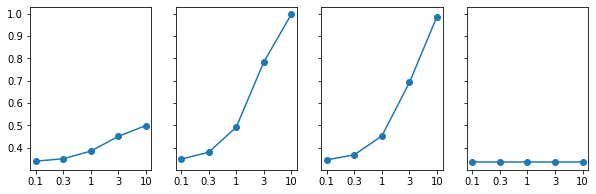

In [8]:
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(10,2))
for i, p in enumerate(probs):
    axs[i].bar([0, 1, 2], p)
plt.show()

str_inv_temps = [str(i) for i in inv_temps]
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(10,3))
# plt.xlabel("inverse temperature")
# plt.ylabel("max(softmax(probs*inv_temp))")
for i, p in enumerate(probs):
    axs[i].plot(str_inv_temps, metric_dict[i], marker='o')


For inverse temperature: 0.1


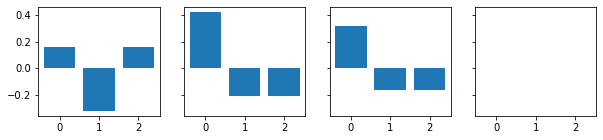

For inverse temperature: 0.3


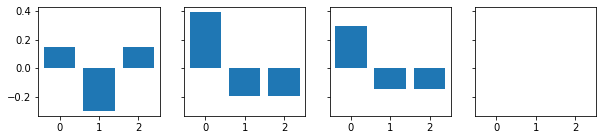

For inverse temperature: 1


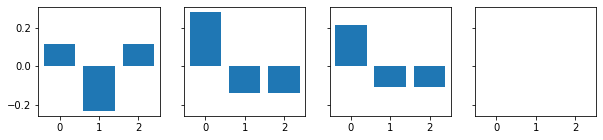

For inverse temperature: 3


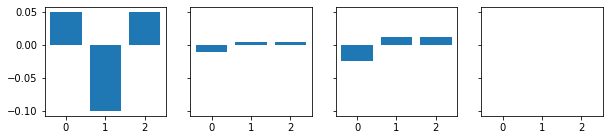

For inverse temperature: 10


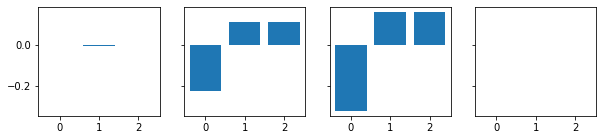

In [9]:
for inv_temp in [0.1, 0.3, 1, 3, 10]:
    print(f"For inverse temperature: {inv_temp}")
    fig, axs = plt.subplots(1, 4, sharey=True, figsize=(10,2))
    for i, p in enumerate(probs):
        axs[i].bar([0, 1, 2], p-torch.softmax(p*inv_temp, dim=0))
    plt.show()

## For 4 inputs